# **Alura Challenge - Alura Voz**

Nesse notebook será realizada a limpeza e tratamento dos dados obtidos a partir da API da Alura Voz, empresa de telecomunicações.

## **Semana 01 - limpeza dos dados trazidos de uma API**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
import json

In [2]:
# Carregando os dados no formato json fazendo com um request no link disponível
url = 'https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json'
response = urlopen(url)
data_json = json.loads(response.read())

In [3]:
# Olhando os dados em um DataFrame
pd.DataFrame(data_json).head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Podemos ver que os dados estão dividios em **quatro grupo distintos**:
- Informações pessoais sobre o usuário e meses de contrato.
- Informações sobre assinatura do serviço telefônico.
- Informações sobre serviços na assinatura de internet.
- Informações sobre o contrato do usuário e gastos.

In [4]:
# Convertendo o json para DataFrame já normalizado no formato de tabela
dados = pd.json_normalize(data_json)

In [5]:
dados.shape

(7267, 21)

In [6]:
# Olhando os dados
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
dados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [8]:
# Mapeamento dos nomes das colunas para renomear
rename = {'customer.gender':'Gender', 'customer.SeniorCitizen':'SeniorCitizen', 'customer.Partner':'Partner', 'customer.Dependents':'Dependents',
          'customer.tenure':'Tenure', 'phone.PhoneService':'PhoneService', 'phone.MultipleLines':'MultipleLines', 'internet.InternetService':'InternetService',
          'internet.OnlineSecurity':'OnlineSecurity', 'internet.OnlineBackup':'OnlineBackup', 'internet.DeviceProtection':'DeviceProtection', 
          'internet.TechSupport':'TechSupport', 'internet.StreamingTV':'StreamingTV', 'internet.StreamingMovies':'StreamingMovies',
          'account.Contract':'Contract', 'account.PaperlessBilling':'PaperlessBilling', 'account.PaymentMethod':'PaymentMethod',
          'account.Charges.Monthly':'Charges_Monthly', 'account.Charges.Total':'Charges_Total'}

# Renomeando as colunas
dados.rename(columns=rename, inplace=True)
dados.columns

Index(['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly',
       'Charges_Total'],
      dtype='object')

In [9]:
# Info dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   Gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   Tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Dados faltantes
dados.isnull().sum()

customerID          0
Churn               0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64

**Não há dados faltantes. Mas, e dados inconsistentes???**

O Atributo **Charges_Total** parece estar no formato não adequado. 

Por ser uma informação numérica tentei converter para float64, mas descrobri que há uma inconsistência na linha 975 dos dados.

In [11]:
# O valor total gasto está vazio, logo não é possível converter para numérico. 
# Irei verificar todos os dados desta coluna a seguir.

dados.loc[975,'Charges_Total']

' '

In [12]:
# Olhando os dados por coluna para tentar ver se há alguma inconsistência dos dados não numéricos além do veriricado anteriormente
for column in dados.columns[1:]:
  print(f'Coluna {column}: {dados[column].unique()}')
  print('--------'*5)

Coluna Churn: ['No' 'Yes' '']
----------------------------------------
Coluna Gender: ['Female' 'Male']
----------------------------------------
Coluna SeniorCitizen: [0 1]
----------------------------------------
Coluna Partner: ['Yes' 'No']
----------------------------------------
Coluna Dependents: ['Yes' 'No']
----------------------------------------
Coluna Tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
----------------------------------------
Coluna PhoneService: ['Yes' 'No']
----------------------------------------
Coluna MultipleLines: ['No' 'Yes' 'No phone service']
----------------------------------------
Coluna InternetService: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Coluna OnlineSecurity: ['No' 'Yes' 'No internet service']
----------------------------------------
Co

**Inconsistência detectadas**:

- Coluna Churn com dados faltantes
- Coluna Charges_Total no formato texto e com dados faltantes.
- Coluna SeniorCitizen no formato não adequado

### **Corrigindo o Charges_Total e o Churn com inconsistência**

In [13]:
# Olhando a inconsistência diretamente na coluna Charges_Total
dados.query('Charges_Total == " "')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [14]:
# Olhando a inconsistência diretamente na coluna Churn
dados.query('Churn == ""')

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


- Há 11 instâncias com os dados de Charges_Total faltando. Todas com **Churn = No**

- Há 224 instâncias com dados de churn faltando.

Antes de excluir, irei verificar o balanceamento dos dados considerando o Churn.

In [15]:
# Contando os dados por churn
dados['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

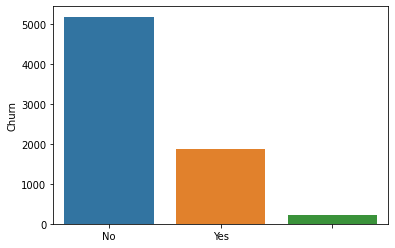

In [16]:
# Plot para ver balanceamento dos dados
sns.barplot(x=dados['Churn'].unique(), y=dados['Churn'].value_counts())

In [17]:
# Calculando a porcentagem
porc_f = dados.query('Churn == ""').shape[0] / dados.shape[0] * 100
porc_f_No = dados.query('Churn == ""').shape[0] / dados.query('Churn == "No"').shape[0] * 100

print(f'A quantidade de dados sem a informação de Churn representa {porc_f:.2f}% de todo o dataset.')
print(f'A quantidade de dados sem a informação de Churn representa {porc_f_No:.2f}% dos dados com Churn = No.')

A quantidade de dados sem a informação de Churn representa 3.08% de todo o dataset.
A quantidade de dados sem a informação de Churn representa 4.33% dos dados com Churn = No.


Com a análise acima, concluo que posso excluir os dados com esta inconsistência.

In [18]:
# Eliminando as linhas com dados inconsistentes
dados.drop(index=dados.query('Charges_Total == " "').index, axis=0, inplace=True)
dados.drop(index=dados.query('Churn == ""').index, axis=0, inplace=True)

In [19]:
# Convertendo os valores para float
dados['Charges_Total'] = dados['Charges_Total'].astype(float)

In [20]:
dados.shape

(7032, 21)

In [21]:
dados.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [22]:
# Contando os dados por churn
dados['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

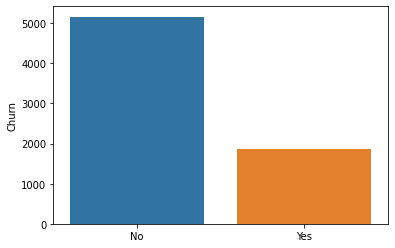

In [23]:
# Plot para ver balanceamento dos dados
sns.barplot(x=dados['Churn'].unique(), y=dados['Churn'].value_counts())

### Corrigindo o SeniorCitizen

In [24]:
dados['SeniorCitizen'] = dados['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   Gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   Tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [26]:
# Criando uma coluna que representa  o valor gasto por dia
daily_Expense = round(dados['Charges_Monthly']/30, 2)

In [27]:
# Inserindo na posição 18
dados.insert(18, 'Daily_Expense', daily_Expense)

In [28]:
dados.head()

,customerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,Daily_Expense,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,2.19,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,2.00,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,2.46,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,3.27,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,2.80,Mailed check,83.9,267.40


### **Agora vamos olhar como ficaram os atributos ao final das correções**

CustomerID é uma informação que não nos interessa, logo não olharemos para ela.

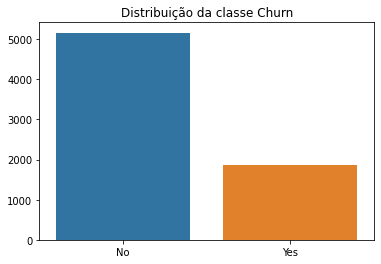

In [29]:
sns.barplot(x=dados['Churn'].value_counts().index, y=dados['Churn'].value_counts().values);
plt.title('Distribuição da classe Churn');

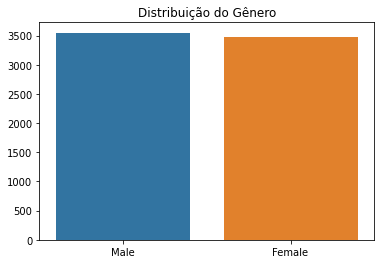

In [30]:
sns.barplot(x=dados['Gender'].value_counts().index, y=dados['Gender'].value_counts().values, data=dados);
plt.title('Distribuição do Gênero');

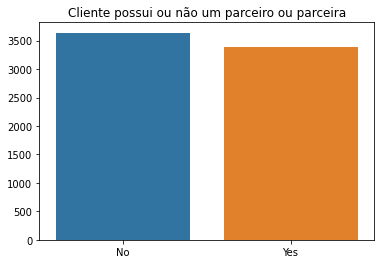

In [31]:
sns.barplot(x=dados['Partner'].value_counts().index, y=dados['Partner'].value_counts().values, data=dados);
plt.title('Cliente possui ou não um parceiro ou parceira');

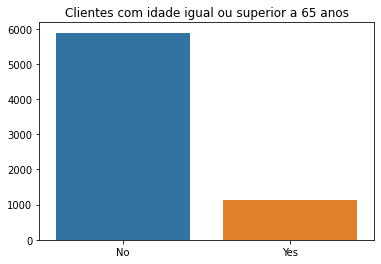

In [32]:
sns.barplot(x=dados['SeniorCitizen'].value_counts().index, y=dados['SeniorCitizen'].value_counts().values, data=dados);
plt.title('Clientes com idade igual ou superior a 65 anos');

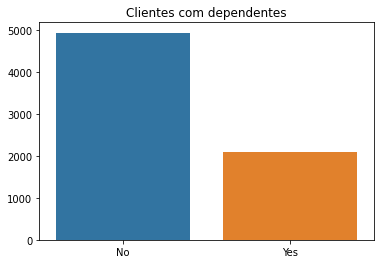

In [33]:
sns.barplot(x=dados['Dependents'].value_counts().index, y=dados['Dependents'].value_counts().values, data=dados);
plt.title('Clientes com dependentes');

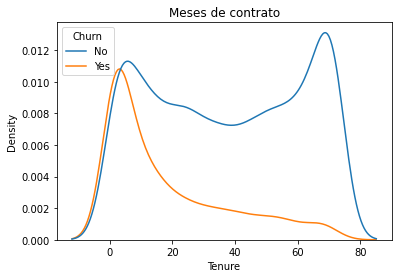

In [34]:
sns.kdeplot(x=dados['Tenure'], data=dados, hue='Churn');
plt.title('Meses de contrato');

In [35]:
dados.describe()

,Tenure,Daily_Expense,Charges_Monthly,Charges_Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,2.159891,64.798208,2283.300441
std,24.545260,1.002955,30.085974,2266.771362
min,1.000000,0.610000,18.250000,18.800000
25%,9.000000,1.187500,35.587500,401.450000
50%,29.000000,2.340000,70.350000,1397.475000
75%,55.000000,2.992500,89.862500,3794.737500
max,72.000000,3.960000,118.750000,8684.800000


In [36]:
# Salvando o arquivo após a limpeza
dados.to_json('Customer-Churn-clean.json')